# Dataframes e Python: Pandas

- Gabriel Wendell Celestino Rocha
- 30 de novembro de 2022

---

## 0. Preliminares

### 0.1 O que é o `Pandas`?

- `Pandas` é uma biblioteca Python usada para trabalhar com conjuntos de dados.

- Possui funções para analisar, limpar, explorar e manipular diversos tipo de dados.

- O nome "Pandas" faz referência a "Panel Data" e "Python Data Analysis" e foi criado por Wes McKinney em 2008.

### 0.2 Por quê usar o `Pandas`?

- O `Pandas` nos permite analisar big data e tirar conclusões com base em teorias estatísticas.

- Podem limpar conjuntos de dados confusos e torná-los legíveis e relevantes.

- Dados relevantes são muito importantes na ciência de dados.

### 0.3 O que o `Pandas` nos permite fazer?

O `Pandas` fornece respostas sobre os dados, como por exemplo:

- Existe uma correlação entre duas ou mais colunas?
- Qual é o valor médio?
- Valor máximo?
- Valor mínimo?

O `Pandas` também podem excluir linhas que não são relevantes ou contêm valores incorretos, como valores vazios ou `NULL`. Isso é chamado de limpeza dos dados.

---

## 1. Estruturando dados tabulares

In [1]:
import numpy as np
import pandas as pd

O `Pandas` tem duas estruturas principais para armazenar dados: `Series` e `DataFrames`. O objeto `Series` pode ser criado a partir de uma lista de valores, como um array, a única diferença é que um objeto `Series` tem índices além dos valores:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Os valores podem ser acessados na forma de um array através do atributo `values`:

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

O atributo `index` corresponde aos índices. No momento, não precisamos nos preocupar com o seu tipo específico:

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

Da mesma forma que arrays, elementos de `Series` podem ser acessados individualmente:

In [5]:
data[1]

0.5

O *slicing* pode ser feito em `Series` usando a mesma sintaxe que estamos acostumados. O resultado é a sub-`Series` correspondente:

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

Os índices podem ser especificados como parte da construção dos dados. Esses índices não precisam ser necessariamente inteiros. No exemplo abaixo eles são `strings`:

In [7]:
xyz = pd.Series([1, 2, 3.5], index = ['x', 'y', 'z'])
xyz

x    1.0
y    2.0
z    3.5
dtype: float64

Quando os índices são `strings`, os elementos podem ser acessados pela `string` correspondente:

In [8]:
xyz['x']

1.0

Os índices tambem não precisam ser consecutivos nem ordenados:

In [9]:
data = pd.Series([0, 1, 1, 0.5], index = [1, 6, 4, 9])
data

1    0.0
6    1.0
4    1.0
9    0.5
dtype: float64

Um objeto `Series` pode ser criado a partir de um único valor, que sera repetido pela quantidade de posições especificada pelo `index`:

In [10]:
pd.Series(np.pi, index = [300, 200, 100])

300    3.141593
200    3.141593
100    3.141593
dtype: float64

- `DataFrame()`:

Se um objeto `Series` equivale a um array 1D, um objeto `DataFrame` equivale a um array 2D. Assim como uma tabela, esse objeto tem nomes de índices e colunas:

In [11]:
pd.DataFrame(np.random.rand(3, 2), columns = ['A', 'B'], index = [1, 2, 3])

,A,B
1,0.008292,0.313673
2,0.364471,0.668800
3,0.290033,0.378963


Para aqueles familiarizados com dicionarios, um `DataFrame` pode ser construído a partir de um dicionario. Nesse caso, cada chave do dicionário corresponde a uma coluna:

In [12]:
pd.DataFrame(dict(Yes = [50, 20], No = ['abc', 3.5], Blah = [np.pi, np.e]))

,Yes,No,Blah
0,50,abc,3.141593
1,20,3.5,2.718282


Podemos combinar números aleatórios para preenchimento da nossa tabela:

In [13]:
df = pd.DataFrame(np.random.rand(3, 2), columns = ['A', 'B'], index = ['Eu', 'Você', 'Zubumafu'])
df

,A,B
Eu,0.116933,0.082546
Você,0.532285,0.469103
Zubumafu,0.474237,0.144996


---

## 2. Trabalhando com dados reais

Vamos baixar um conjuntos de observações de meteoritos feitos pela NASA e pode ser acessada através do site [Meteorite Landings](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) do NASA Open Data Portal.

```Python
!curl -O https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv
```

- Leitura dos dados:

Normalmente, um objeto `DataFrame` é construído a partir de dados registrados em um arquivo. A leitura de um arquivo `.csv` se dá através da função `pd.read_csv()` tendo como argumento o caminho completo para seu arquivo. Usando o comando acima o arquivo é armazenado no mesmo diretório deste `Notebook` com o nome `rows.csv`.

In [14]:
meteorites = pd.read_csv('rows.csv')
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


O método `head` permite visualizar as 5 primeiras linhas de um `DataFrame`:

In [15]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


Por outro lado, o método `tail` permite visualizar as 5 últimas linhas de um `DataFrame`:

In [16]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


- Indexação

Mesmo que os índices seja `strings`, ainda é possível usar o *slicing*:

In [17]:
xyz['x':'y']

x    1.0
y    2.0
dtype: float64

Os valores podem ser modificados em posições dadas pelos índices caso um índice que não exista acabe sendo utilizado. Nesse caso, um índice é criado e o novo elemento é acrescentado ao `DataFrame`:

In [18]:
xyz['y'] = 3
xyz

x    1.0
y    3.0
z    3.5
dtype: float64

Também é possível fazer a indexação usando os índices implicítos, ignorando os índices e tratando o objeto `Series` como um array comum:

In [19]:
xyz[0:2]

x    1.0
y    3.0
dtype: float64

Vamos dar uma olhada no objeto `Series`:

In [20]:
data

1    0.0
6    1.0
4    1.0
9    0.5
dtype: float64

Para uma `Series` com índices inteiros, essas notações de índices implicítos/explicítos pode originar ambiguidades e confusões:

In [21]:
data[1]

0.0

Para evitar tais confusões, usamos `.loc` para nos referirmos aos índices explicítos:

In [22]:
data.loc[9]

0.5

Usamos o atributo `.iloc` para nos referir aos índices implicítos:

In [23]:
data.iloc[1]

1.0

Podemos indexar um `DataFrame` pelo nome de uma coluna. O resultado é o objeto `Series` correspondente a essa coluna:

In [24]:
df['A']

Eu          0.116933
Você        0.532285
Zubumafu    0.474237
Name: A, dtype: float64

Toda coluna também pode ser acessada como um atributo por conveniência, ou seja, `meteorites['name']` é equivalente à `meteorites.name`. Naturalmente isso só vale para colunas cujos nomes não possuem espaços:

In [25]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

Os objetos `DataFrame` também possuem um atributo chamado `values` que revela o array 2D armazenado no mesmo:

In [26]:
df.values

array([[0.11693313, 0.08254637],
       [0.53228454, 0.46910291],
       [0.47423738, 0.14499636]])

A indexação de `DataFrames` usando o atributo `.iloc` pode ser feita com qualquer indexação vista até aqui. Por exemplo, podemos usar o *fancy indexing* para as linhas e um `int` para as colunas:

In [27]:
meteorites.iloc[[1, 2, 3], 0]

1      Aarhus
2        Abee
3    Acapulco
Name: name, dtype: object

Analogamente, podemos indexar os índices e as colunas explicitamente através do atributo `.loc`. Por exemplo, podemos usar o método de *slicing* da seguinte forma:

In [28]:
meteorites.loc[:, 'name':'recclass']

,name,id,nametype,recclass
0,Aachen,1,Valid,L5
1,Aarhus,2,Valid,H6
2,Abee,6,Valid,EH4
3,Acapulco,10,Valid,Acapulcoite
4,Achiras,370,Valid,L6
...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite
45712,Zinder,30409,Valid,"Pallasite, ungrouped"
45713,Zlin,30410,Valid,H4
45714,Zubkovsky,31357,Valid,L6


Eventualmente podemos querer alterar os índices para uma das colunas...

In [29]:
meteorites.set_index('name')

,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
name,,,,,,,,,
Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


Podemos também usar máscaras booleanas para indexar um `DataFrame`. Por exemplo, vamos avaliar todas as observações nas quais a massa do meteorito excedeu $200\text{ g}$:

In [30]:
meteorites[meteorites['mass (g)'] > 200]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
...,...,...,...,...,...,...,...,...,...,...
45707,Zhaoping,54609,Valid,"Iron, IAB complex",2000000.0,Found,1983.0,24.23333,111.18333,"(24.23333, 111.18333)"
45708,Zhigansk,30405,Valid,"Iron, IIIAB",900000.0,Found,1966.0,68.00000,128.30000,"(68.0, 128.3)"
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000,"(31.2, 112.5)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"


---

## 3. Manipulando dataframes

- Operações:

Operações unárias em objetos `Series` são realizadas de elemento a elemento, preservando os seus respectivos índices:

In [31]:
np.exp(data)

1    1.000000
6    2.718282
4    2.718282
9    1.648721
dtype: float64

O mesmo ocorre com objetos `DataFrames`, preservando tanto índices quanto colunas:

In [32]:
np.sin(df * np.pi / 4)

,A,B
Eu,0.091710,0.064786
Você,0.405984,0.360154
Zubumafu,0.363913,0.113634


Operações binárias entre objetos `Series` ou `DataFrame` sempre alinham os índices antes da operação:

In [33]:
alturas = pd.Series(index = ['Zuza', 'Wendell', 'Ted'], data = [180.5, 190, 200])
idades = pd.Series(index = ['Ted', 'Wendell', 'Edu'], data = [65, 45, 5])

print(alturas)
print('')
print(idades)

Zuza       180.5
Wendell    190.0
Ted        200.0
dtype: float64

Ted        65
Wendell    45
Edu         5
dtype: int64


Se algum índice não pertence aos dois operandos, o resultado é `NaN` (Not a Number). O alinhamento de índices evita erros quando os operandos estão em ordens diferentes:

In [34]:
alturas / idades

Edu             NaN
Ted        3.076923
Wendell    4.222222
Zuza            NaN
dtype: float64

O tipo de um objeto `Series` ou `DataFrame` pode ser modificado da mesma forma que arrays usando atributo `astype`:

In [35]:
alturas.astype(int)

Zuza       180
Wendell    190
Ted        200
dtype: int32

- Lacunas:

`NaN` e `None` são interpretados pelo `Pandas` como sentinelas de valores inválidos. Quando os valores são numéricos usa-se `NaN` (sempre `float`). Já com valores não-numéricos (`strings`, por exemplo) usa-se `None`:

In [36]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Vamos criar um objeto `Series` e analisar alguns fatos quanto às lacunas em uma tabela:

In [37]:
x = pd.Series([0, 1], dtype = int)
x

0    0
1    1
dtype: int32

Note que `x` originalmente não tem lacunas e é do tipo `int`. Quando uma lacuna é introduzida, por ser numérica, o `Pandas` armazena a lacuna como `NaN` e transforma `x` automaticamente no tipo `float`:

In [38]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

O atributo `isnull` identifica os índices em que existem lacunas nos dados:

In [39]:
data = pd.Series([1, None, 'Hahahaha', np.nan])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Por outro lado, o atributo `notnull` faz justamente o oposto de isnull. Ambos podem ser usados como máscaras booleanas:

In [40]:
data.loc[data.notnull()]

0           1
2    Hahahaha
dtype: object

Para remover todas as lacunas, existe o método `dropna`:

In [41]:
data.dropna()

0           1
2    Hahahaha
dtype: object

Uma opção alternativa seria preencher as lacunas com valores válidos. Podemos inclusive usar um valor constante para isso:

In [42]:
data.fillna(0)

0           1
1           0
2    Hahahaha
3           0
dtype: object

Outros métodos de preenchimento incluem o `ffill` (*forward fill*) e o `bfill` (*backward fill*):

In [43]:
data.fillna(method = 'ffill')

0           1
1           1
2    Hahahaha
3    Hahahaha
dtype: object

In [44]:
data.fillna(method = 'bfill')

0           1
1    Hahahaha
2    Hahahaha
3         NaN
dtype: object

- Combinações

In [45]:
df1 = pd.DataFrame([['a1', 'b1'], ['a2', 'b2']], columns = ['a', 'b'], index = [1, 2])
df1

,a,b
1,a1,b1
2,a2,b2


Podemos efetuar a concatenação entre dois `DataFrames` atráves do método `pd.concat`:

In [46]:
pd.concat([df1, df1])

,a,b
1,a1,b1
2,a2,b2
1,a1,b1
2,a2,b2


O resultado da concatenação mantém as colunas e une os índices:

In [47]:
df2 = pd.DataFrame([['a3', 'b3'], ['a4', 'b4']], columns = ['a', 'b'], index = [3, 4])
df2

,a,b
3,a3,b3
4,a4,b4


In [48]:
pd.concat([df1, df2])

,a,b
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


Caso as colunas não sejam idênticas, utiliza-se a união das colunas. Além disso, elementos sem valor virar lacunas:

In [49]:
df3 = pd.DataFrame([['b3', 'c3'], ['b4', 'c4']], columns = ['b', 'c'], index = [3, 4])
df3

,b,c
3,b3,c3
4,b4,c4


In [50]:
pd.concat([df1, df3])

,a,b,c
1,a1,b1,NaN
2,a2,b2,NaN
3,NaN,b3,c3
4,NaN,b4,c4


Note que os dois `DataFrames` abaixo possuem uma coluna em comum (`'Curso'`):

In [51]:
df1 = pd.DataFrame(
    columns = ['Aluno', 'Curso'],
    data = [
        ['Jose', 'Fisica'],
        ['Josefa', 'Fisica'],
        ['Josefina', 'Filosofia'],
        ['Josuel', 'Fotografia']
    ]
)

df2 = pd.DataFrame(
    columns = ['Curso', 'Preco'],
    data = [
        ['Filosofia', 10],
        ['Fisica', 50],
        ['Fotografia', 100]
    ]
)
df1

,Aluno,Curso
0,Jose,Fisica
1,Josefa,Fisica
2,Josefina,Filosofia
3,Josuel,Fotografia


Tabelas podem ser combinadas usando o método `pd.merge`. O resultado inclui o preço de cada curso, mesmo que algum curso se repita mais de uma vez:

In [52]:
pd.merge(df1, df2)

,Aluno,Curso,Preco
0,Jose,Fisica,50
1,Josefa,Fisica,50
2,Josefina,Filosofia,10
3,Josuel,Fotografia,100


Essa terceira tabela se refere aos mesmos alunos das tabelas anteriores, mas com relação a uma coluna chamada `'Nome'`:

In [53]:
df3 = pd.DataFrame(
    columns = ['Nome', 'Superpoder'],
    data = [
        ['Josefa', 'Telepatia'],
        ['Josefina', 'Teletransporte'],
        ['Jose', 'Televisao']
    ]
)

As opções `left_on` e `right_on` podem ser utilizadas para especificar o nome das colunas que serão usadas no método `pd.merge`. A opção `how` pode ser usada para resultar na **interseção** (`'inner'`) ou na **união** (`'outer'`) entre as colunas chave. Já o método `'drop'` remove uma coluna do `DataFrame` se `axis = 1` (se `axis = 0` o método remove uma linha). Aqui, estaremos removendo uma coluna que é redundante:

In [54]:
pd.merge(df1, df3, left_on = 'Aluno', right_on = 'Nome', how = 'outer').drop('Nome', axis = 1)

,Aluno,Curso,Superpoder
0,Jose,Fisica,Televisao
1,Josefa,Fisica,Telepatia
2,Josefina,Filosofia,Teletransporte
3,Josuel,Fotografia,NaN


- Plotando dataframes:

Podemos fazer plots simples dentro do próprio ambiente do `Pandas`. Para isso, basta especificarmos a coluna do eixo `x` e a coluna do eixo `y`. Existem muitos outros argumentos que podem ser usados para customizar o plot:

C:\Users\Gabriel Wendell\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='reclong', ylabel='reclat'>

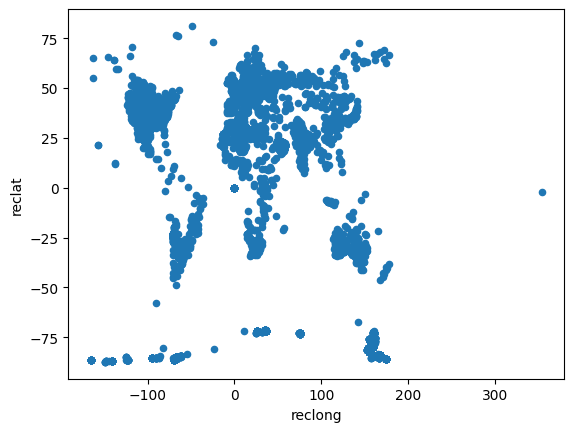

In [55]:
meteorites.plot(x = "reclong", y = "reclat", kind = "scatter")

## 4. Agregando dataframes

In [56]:
import seaborn as sns

Vamos usar o `seaborn` somente para carregar o dataset `planets` que contém os exoplanetas descobertos até 2014:

In [57]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


As funções de agregação seguem a mesma sintaxe do `NumPy` (`mean`, `max`, `min`, `sum`, `std`, `var`, etc):

In [58]:
print('Mean = ', xyz.mean())
print('Max =', xyz.max())
print('Min =', xyz.min())
print('Sum =', xyz.sum())
print('Std = ', xyz.std())
print('Var =', xyz.var())

Mean =  2.5
Max = 3.5
Min = 1.0
Sum = 7.5
Std =  1.3228756555322954
Var = 1.75


Uma função extremamente útil para obter uma visão geral dos dados numéricos é o atributo `describe`:

In [59]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


O método `describe` pode ser aplicado a uma coluna de `strings`. Nesse caso as informações são diferentes:

In [60]:
planets.method.describe()

count                1035
unique                 10
top       Radial Velocity
freq                  553
Name: method, dtype: object

- Frequência de valores:

O método `value_counts` da a frequência que cada valor tem em uma determinada coluna. Aqui podemos ver quantos planetas foram descobertos por cada método:

In [61]:
planets.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

- Operações em sub-tabelas:

O método `groupby` é extremamente util e flexível. Ele permite realizar operações em sub-tabelas separadas por colunas específicas. Nesse caso, calculamos o período orbital mediano para cada método:

In [62]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Podemos combinar o método `groupby` com `agg` para realizar míltiplas operações simultaneamente. Aqui calculamos a quantidade, a mediana e a máxima das massas dos planetas detectados anualmente. Note que as funções podem ser especificadas como `strings` ou como as próprias funções:

In [63]:
planets.groupby('year').mass.agg(["count", np.median, max])

,count,median,max
year,,,
1989,1,11.6800,11.680
1992,0,NaN,NaN
1994,0,NaN,NaN
1995,1,0.4720,0.472
1996,4,1.6650,3.900
1997,1,1.0400,1.040
1998,5,1.3900,8.020
1999,14,1.9855,8.440
2000,14,1.4150,18.100


Definimos um novo `Series` a partir da coluna `'year'`. Para isso usamos a divisão inteira (`//`) para calcular a década em que cada planeta foi detectado:

In [64]:
decade = 10 * (planets['year'] // 10)
decade

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

Usamos o atributo `astype` para converter as décadas para `strings` e concatenamos cada uma com uma string `'s'`:

In [65]:
decade = decade.astype(str) + "s"
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

O método `unique` remove os valores repetidos e diz quais os diferentes valores presentes na `Series`:

In [66]:
decade.unique()

array(['2000s', '2010s', '1990s', '1980s'], dtype=object)

Calculamos então a quantidade de planetas descobertos em cada década por cada método. Então preenchemos as lacunas com zeros, que nesse caso é o valor que faz sentido físico. Usamos o atributo `unstack` para separar os dois índices (métodos e décadas) em índices e colunas:

In [67]:
result = planets.groupby(['method', decade])['number'].count().unstack().fillna(0)
result

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,3.0,6.0
Imaging,0.0,0.0,20.0,18.0
Microlensing,0.0,0.0,10.0,13.0
Orbital Brightness Modulation,0.0,0.0,0.0,3.0
Pulsar Timing,0.0,3.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,28.0,309.0,215.0
Transit,0.0,0.0,62.0,335.0


Objetos `DataFrames` podem ser modificados usando qualquer uma das indexações que vimos até agora:

In [68]:
df.loc['You', 'B'] = 0
df

,A,B
Eu,0.116933,0.082546
Você,0.532285,0.469103
Zubumafu,0.474237,0.144996
You,NaN,0.000000


Para salvar o resultado em um arquivo `.csv`, usamos o método `to_csv`:

In [69]:
df.to_csv('Teste.csv')

A função `sort_value` permite ordenar um objeto `Series` por seus valores. O argumento `ascending = False` faz a ordenação ser decrescente:

In [70]:
planets.groupby('method')['orbital_period'].median().sort_values(ascending = False)

method
Imaging                          27500.000000
Eclipse Timing Variations         4343.500000
Microlensing                      3300.000000
Pulsation Timing Variations       1170.000000
Astrometry                         631.180000
Radial Velocity                    360.200000
Pulsar Timing                       66.541900
Transit Timing Variations           57.011000
Transit                              5.714932
Orbital Brightness Modulation        0.342887
Name: orbital_period, dtype: float64

Um `DataFrame` também pode ser ordenado por uma de suas colunas, especificada pelo argumento `by`. Nesse caso, encontramos os 5 planetas da tabela com maior massa:

In [71]:
planets.dropna().sort_values(by = "mass").tail()

,method,number,orbital_period,mass,distance,year
462,Radial Velocity,1,1951.0000,18.15,57.21,2008
317,Radial Velocity,1,1.3283,18.37,43.03,2003
3,Radial Velocity,1,326.0300,19.40,110.62,2007
63,Radial Velocity,1,305.5000,20.60,92.51,2013
321,Radial Velocity,1,2371.0000,25.00,37.05,2008


---

![image](https://c.tenor.com/hEOM8E4epvgAAAAC/hahaha-thats-all-folks.gif)

---